# Preprocessed Data

In [248]:
# retrieve the preprocessed data from previous notebook

%store -r x_train 
%store -r x_test 
%store -r y_train 
%store -r y_test 
%store -r Y
%store -r le

In [249]:
x_train.shape

(6985, 40, 174)

# Parallel CNN

## Model Design

In [270]:
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, Reshape, Concatenate
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_rows = 40
num_columns = 174
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = Y.shape[1]
filter_size = 2

# 1 layer
p1 = Sequential()
p1.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
p1.add(MaxPooling2D(pool_size=2))
p1.add(Dropout(0.2))
p1.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
p1.add(MaxPooling2D(pool_size=2))
p1.add(Dropout(0.2))
p1.add(GlobalAveragePooling2D())

# 2 layer
p2 = Sequential()
p2.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
p2.add(MaxPooling2D(pool_size=2))
p2.add(Dropout(0.2))
p2.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
p2.add(MaxPooling2D(pool_size=2))
p2.add(Dropout(0.2))
p2.add(GlobalAveragePooling2D())

#Layers concatenation
model_concat = concatenate([p1.output, p2.output], axis=-1) 
model_concat = Dense(num_labels, activation='softmax')(model_concat)
model = Model(inputs=[p1.input, p2.input], outputs=model_concat)

## Model Compilation

In [272]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [273]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate([x_test, x_test], y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "model_42"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv2d_188_input (InputLayer)   (None, 40, 174, 1)   0                                            
__________________________________________________________________________________________________
conv2d_190_input (InputLayer)   (None, 40, 174, 1)   0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 39, 173, 16)  80          conv2d_188_input[0][0]           
__________________________________________________________________________________________________
conv2d_190 (Conv2D)             (None, 39, 173, 16)  80          conv2d_190_input[0][0]           
___________________________________________________________________________________________

## Model Training

In [268]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 72
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_pcnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit([x_train, x_train], y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=([x_test,x_test], y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Train on 6985 samples, validate on 1747 samples
Epoch 1/72
6985/6985 [==============================] - 66s 10ms/step - loss: 1.3581 - accuracy: 0.5160 - val_loss: 1.3294 - val_accuracy: 0.5524

Epoch 00001: val_loss improved from inf to 1.32941, saving model to saved_models/weights.best.basic_pcnn.hdf5
Epoch 2/72
6985/6985 [==============================] - 65s 9ms/step - loss: 1.2800 - accuracy: 0.5465 - val_loss: 1.3641 - val_accuracy: 0.5278

Epoch 00002: val_loss did not improve from 1.32941
Epoch 3/72
6985/6985 [==============================] - 65s 9ms/step - loss: 1.2434 - accuracy: 0.5656 - val_loss: 1.2498 - val_accuracy: 0.5919

Epoch 00003: val_loss improved from 1.32941 to 1.24982, saving model to saved_models/weights.best.basic_pcnn.hdf5
Epoch 4/72
6985/6985 [==============================] - 67s 10ms/step - loss: 1.1978 - accuracy: 0.5772 - val_loss: 1.2109 - val_accuracy: 0.5867

Epoch 00004: val_loss improved from 1.24982 to 1.21091, saving model to saved_models/weight

6985/6985 [==============================] - 68s 10ms/step - loss: 0.7405 - accuracy: 0.7443 - val_loss: 0.8366 - val_accuracy: 0.7189

Epoch 00035: val_loss did not improve from 0.78826
Epoch 36/72
6985/6985 [==============================] - 65s 9ms/step - loss: 0.7329 - accuracy: 0.7469 - val_loss: 0.7759 - val_accuracy: 0.7533

Epoch 00036: val_loss improved from 0.78826 to 0.77593, saving model to saved_models/weights.best.basic_pcnn.hdf5
Epoch 37/72
6985/6985 [==============================] - 65s 9ms/step - loss: 0.7286 - accuracy: 0.7552 - val_loss: 0.7995 - val_accuracy: 0.7401

Epoch 00037: val_loss did not improve from 0.77593
Epoch 38/72
6985/6985 [==============================] - 65s 9ms/step - loss: 0.7314 - accuracy: 0.7545 - val_loss: 0.8004 - val_accuracy: 0.7321

Epoch 00038: val_loss did not improve from 0.77593
Epoch 39/72
6985/6985 [==============================] - 65s 9ms/step - loss: 0.7257 - accuracy: 0.7503 - val_loss: 0.8393 - val_accuracy: 0.7241

Epoch 000

## Testing the model

In [274]:
# Evaluating the model on the training and testing set
score = model.evaluate([x_train, x_train], y_train, verbose=0)
accuracy = 100*score[1]
print("Training Accuracy: %.4f%%" % accuracy)

score = model.evaluate([x_test, x_test], y_test, verbose=0)
accuracy = 100*score[1]
print("Testing Accuracy: %.4f%%" % accuracy)

Training Accuracy: 81.7180%
Testing Accuracy: 78.9353%


## Plotting the trained model

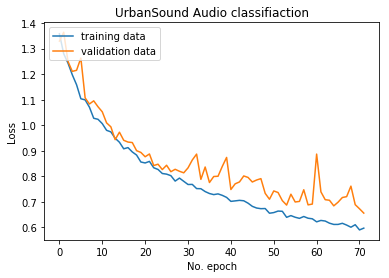

In [275]:
# Plot history: 
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('UrbanSound Audio classifiaction')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()